# Objectives:

In this exercise, you will:

 - Analyze the dataset in the given CSV file
 - Clean the given dataset
 - Load the dataset into sqlite database engine
 - Execute different SQL queries

###   Data Preparation

As a data scientist for BestDeal retailer, you have been tasked with improving their revenue and the effectiveness of the marketing campaign of their electronic products. The given dataset has 10,000 records for the purchases of their customers and is used to predict customers shopping patterns and to provide answers for ad-hoc queries. The dataset DirtyData4BestDeal10000.csv is drawn from its database of customers.

In [37]:
import pandas as pd  # panda's alias is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

from sqlalchemy import create_engine

from sqlalchemy import inspect

### Lets read the dirtydata4bestdeal CSV and load into a dataframe object

In [38]:
dirtydata4bestdeal=pd.read_csv('DirtyData4BestDeal10000.csv')

In [17]:

# Do you see NaN values below?

dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

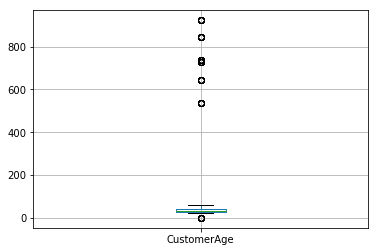

In [18]:
# https://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb
%matplotlib inline
dirtydata4bestdeal.boxplot(column='CustomerAge')


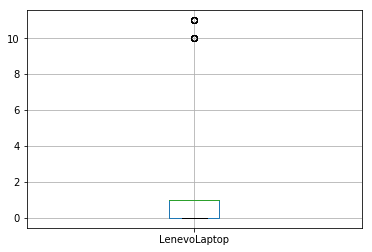

In [19]:
dirtydata4bestdeal.boxplot(column='LenevoLaptop')

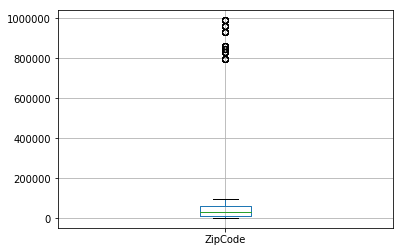

In [7]:
dirtydata4bestdeal.boxplot(column='ZipCode')


### Lets clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [135]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()


,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [65]:
# Let's see how many rows are left...
cleandata4bestdeal.shape
cleandata4bestdeal.columns

Index(['ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED', 'XBOX360',
       'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet', 'SonyHeadSet', 'iPod',
       'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU', 'WDexternalHD',
       'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard', 'SonySoundSystem',
       'SonyCamera', 'PanasonicCamera', 'HPPrinter', 'SonyDVDplayer',
       'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet', 'HPLaptop',
       'HDMICable', 'SpeakerCable', 'CallOfDutyGame', 'GrandTheftAutoGame',
       'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Requirement: add the rest of your code here to finish cleaning the data


In [136]:
# Add the rest of your code here to clean the data
# I ended up with 9140 records by deleting records with out range customer ages 
# and out of range product flags (i.e. not 0 or 1).

#Replaces blank spaces with NA
cleandata4bestdeal = cleandata4bestdeal.replace(r'\s+', np.nan, regex=True)
cleandata4bestdeal = cleandata4bestdeal.fillna(value=pd.np.nan)
cleandata4bestdeal = cleandata4bestdeal.dropna()
cleandata4bestdeal = cleandata4bestdeal.astype(int)

# Drops rows with ages out of range
cleandata4bestdeal = cleandata4bestdeal.drop(cleandata4bestdeal[(cleandata4bestdeal.CustomerAge < 18) & (cleandata4bestdeal.CustomerAge > 150)].index)


# Drops rows with ZIPCodes errors
cleandata4bestdeal = cleandata4bestdeal.drop(cleandata4bestdeal[(cleandata4bestdeal.ZipCode <= 9999)].index)
cleandata4bestdeal = cleandata4bestdeal.drop(cleandata4bestdeal[(cleandata4bestdeal.ZipCode >= 99999)].index)


# Drop rows with out of range product flags

for col in cleandata4bestdeal.drop(['ZipCode','CustomerAge'],axis=1).columns:
    cleandata4bestdeal = cleandata4bestdeal.drop(cleandata4bestdeal[(cleandata4bestdeal[col] > 1)].index)

cleandata4bestdeal


,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134,35,1,1,1,0,0,1,1,0,...,1,0,1,1,1,1,0,1,1,1
1,62791,43,0,1,0,0,1,0,1,0,...,1,0,1,0,1,1,0,1,1,1
3,60616,56,0,1,1,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
6,90033,44,1,1,1,1,0,0,0,0,...,1,1,1,1,0,1,1,0,0,1
13,62791,27,1,1,0,1,0,0,0,0,...,1,1,1,0,0,1,0,1,1,1
16,60616,43,0,1,1,0,1,0,1,0,...,1,0,1,1,1,1,0,1,1,1
18,60616,54,1,0,0,1,0,1,1,0,...,0,1,1,0,1,1,0,1,1,1
19,60603,59,0,1,1,1,0,0,1,1,...,1,0,1,0,0,1,1,0,0,1
20,30134,28,1,1,1,0,1,1,1,0,...,0,1,1,0,1,0,0,1,1,0
21,33130,27,1,1,1,1,0,0,0,0,...,1,0,1,0,0,1,0,1,1,1


### Lets store the cleaned data into the Database

In [140]:
engine=create_engine('sqlite:///bestdeal.db')

In [141]:
# cleandata4bestdeal.to_sql('trans4cust', engine)
# cleandata4bestdeal.to_sql('trans4cust', engine, chunksize=100) 
cleandata4bestdeal.to_sql('trans4cust', engine, if_exists='replace')

In [142]:
insp=inspect(engine)

In [143]:
 insp.get_table_names()

['trans4cust']

In [16]:
pd.read_sql_table('trans4cust', engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query #1: get the transactions for the customers in zipCode 60616

In [17]:
resultsForBestDealCustTrans=\
pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [18]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3,60616.0,56.0,0,1,1,1,0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,16,60616.0,43.0,0,1,1,0,1,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
2,18,60616.0,54.0,1,0,0,1,0,1.0,1.0,...,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,23,60616.0,43.0,1,1,1,0,1,1.0,1.0,...,1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1
4,34,60616.0,31.0,0,1,1,1,0,0.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1


#### Query #2: get the transactions for ALL customers

In [19]:
resultsForBestDealCustTrans=\
pd.read_sql_query("SELECT * FROM trans4cust", engine)

In [20]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,0,30134.0,35.0,1,1,1,0,0,1.0,1.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,1,62791.0,43.0,0,1,0,0,1,0.0,1.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,3,60616.0,56.0,0,1,1,1,0,0.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,5,2108.0,55.0,1,1,1,1,10,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
4,6,90033.0,44.0,1,1,1,1,0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


#### Query #3: get the number of customers in every ZipCode sorted by ZipCode

In [23]:
resultsForBestDealCustTrans=\
pd.read_sql_query('''
SELECT printf("%g",ZipCode) ZipCode , COUNT(*) as 'num_customers'
FROM trans4cust GROUP BY ZipCode
ORDER BY ZipCode
''', engine)

In [24]:
resultsForBestDealCustTrans

,ZipCode,num_customers
0,10065,788
1,2108,632
2,2109,955
3,2110,224
4,30134,1173
5,30303,1001
6,33129,554
7,33130,280
8,44114,526
9,60532,243


#### Query #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [25]:
resultsForBestDealCustTrans=\
pd.read_sql_query('''
SELECT CustomerAge , COUNT(*) as 'num_customers'
FROM trans4cust 
WHERE ZipCode=60616
GROUP BY CustomerAge
ORDER BY CustomerAge
''', engine)

In [26]:
resultsForBestDealCustTrans

,CustomerAge,num_customers
0,21.0,56
1,22.0,32
2,23.0,40
3,25.0,88
4,26.0,48
5,27.0,32
6,28.0,32
7,29.0,56
8,31.0,16
9,32.0,16


#### Query #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products (either bought one of these products or the two products)

In [33]:
SonyTV60LEDCustTrans=pd.read_sql_query(
'''
SELECT ZipCode , COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE SonyTV60LED=1
GROUP BY ZipCode
HAVING COUNT(*) > 400
''', engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
'''
SELECT ZipCode , COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE BoseSoundSystem=1
GROUP BY ZipCode
HAVING COUNT(*) > 400
''', engine)

In [34]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,2108.0,416
1,2109.0,611
2,10065.0,467
3,30134.0,774
4,30303.0,524
5,60616.0,697


In [35]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,2109.0,436
1,30134.0,832
2,30303.0,472
3,60616.0,467
4,90033.0,406


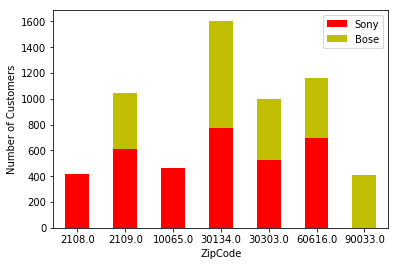

In [61]:
# Create the stacked bar plot...
df =pd.merge(SonyTV60LEDCustTrans, BoseSoundSystemCustTrans, 
         on='ZipCode',how='outer').fillna(0)
df.columns = ['ZipCode', 'Sony', 'Bose']
df.set_index('ZipCode').plot(kind='bar',stacked=True,
                             rot = 0, color=['r','y'])
plt.ylabel('Number of Customers')
plt.show()

In [24]:
SonyTV60LEDCustTrans.ZipCode


0     2108.0
1     2109.0
2    10065.0
3    30134.0
4    30303.0
5    60616.0
Name: ZipCode, dtype: float64

In [56]:
# Original more lengthy approach to creating the stacked bar graph.
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))




sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0

        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


        
bose_zip= sorted(bose_dict.keys())

sony_zip= sorted(sony_dict.keys())

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)


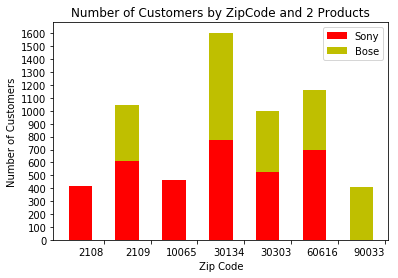

In [58]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


ind = np.arange(len(sony_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 1610, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

In [ ]:
SonyTV60LEDCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE SonyTV60LED=1  GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust WHERE BoseSoundSystem=1 GROUP BY ZipCode HAVING COUNT(*) > 400", engine)

In [147]:
# Req 1: Get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge

DellHPCustomers = pd.read_sql_query(
"SELECT CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE DellLaptop = 1 and HPPrinter = 1 GROUP BY CustomerAge  ORDER BY CustomerAge", engine)

DellHPCustomers

,CustomerAge,num_customers
0,21,179
1,22,171
2,23,234
3,25,64
4,26,159
5,27,228
6,28,48
7,29,124
8,31,122
9,32,173


In [145]:
# Req 2: Get a list of Zipcodes where no customer bought XBOX360

NoXBOXZipcodes = pd.read_sql_query(
"SELECT ZipCode FROM trans4cust WHERE XBOX360 = 0 GROUP BY ZipCode ORDER BY ZipCode", engine)

NoXBOXZipcodes

,ZipCode
0,10065
1,30134
2,30303
3,33129
4,33130
5,44114
6,60532
7,60585
8,60603
9,60611


In [168]:
# Req 3: Show the top 3 zip codes with the most customers

TopZip=pd.read_sql_query(
"SELECT ZipCode , COUNT(*) as 'num_customers' FROM trans4cust GROUP BY ZipCode order by count(*) DESC limit 3", engine)

TopZip

,ZipCode,num_customers
0,30134,1141
1,30303,985
2,60616,959


In [179]:
# Req 4: Selecting the customers from the top 3 zip codes (results from question 3), what are ages of the customers? 
# Sort output by most customers. You can show all 3 zip codes combined or show ages by zip codes.

TopZipAge=pd.read_sql_query(
"SELECT ZipCode, CustomerAge , COUNT(*) as 'num_customers' FROM trans4cust WHERE ZipCode in (30134, 30303, 60616) GROUP BY ZipCode, CustomerAge ORDER BY count(*) DESC", engine)

TopZipAge

,ZipCode,CustomerAge,num_customers
0,30134,25,154
1,60616,34,96
2,60616,25,88
3,60616,44,87
4,30134,29,84
5,30303,26,83
6,30303,27,81
7,30303,44,77
8,30134,43,75
9,30134,34,74
